<a href="https://colab.research.google.com/github/SeJin317/-/blob/main/20230105_%EA%B3%A0%EB%A0%A4%EB%8C%80%ED%95%99%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import requests
import pandas as pd
import time

In [14]:
def make_table(code):

    dic = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1)"} #안드로이드로 접근하고 있는 것으로 인식하게끔 함

    url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code={code}&page=1", headers = dic)
    html = BeautifulSoup(url.text)

    page = int(html.find("td", class_ = 'pgRR').find("a")['href'].split("=")[-1])

    total = []
    for n in tqdm(range(1, page+1)):
        url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code={code}&page={n}", headers = dic)
        html = BeautifulSoup(url.text)
        table = html.find("table")
        table = pd.read_html(str(table))[0].dropna()
        del table['전일비']
        total.append(table)
        time.sleep(0.1)

    stock = pd.concat(total, ignore_index=True)
    return stock

In [3]:
df = make_table("005930")
df

100%|██████████| 666/666 [08:07<00:00,  1.37it/s]


,날짜,종가,시가,고가,저가,거래량
0,2023.01.05,58200.0,58200.0,58800.0,57900.0,7148931.0
1,2023.01.04,57800.0,55700.0,58000.0,55600.0,20188071.0
2,2023.01.03,55400.0,55400.0,56000.0,54500.0,13547030.0
3,2023.01.02,55500.0,55500.0,56100.0,55200.0,10031448.0
4,2022.12.29,55300.0,56000.0,56200.0,55300.0,11295935.0
...,...,...,...,...,...,...
6655,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
6656,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
6657,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
6658,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


In [ ]:
df2 = df2.reset_index

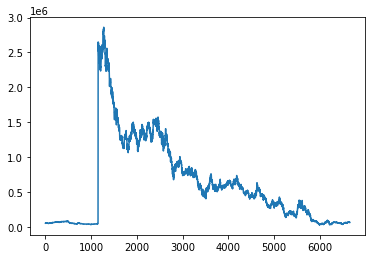

In [15]:
import matplotlib.pyplot as plt

plt.plot(df[ '종가'])

In [ ]:
train = df[df['날짜']] #과거부터 2021년까지 학습시킴
test = [] #2022년부터 현재까지

df


In [24]:
#감정분석해보기

total = []
for n in tqdm(range(1, 3992, 10)):
    url = requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EA%B3%A0%EB%A0%A4%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=22&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={n}")
    html = BeautifulSoup(url.text)
    news = html.find("ul", class_ = 'list_news').find_all('li', class_= 'bx')
    
    for i in news:
        title = i.find('a', class_ = 'news_tit')['title']
        summary = i.find('div', class_ = 'dsc_wrap').text
        total.append([title,summary])
    time.sleep(0.1)

100%|██████████| 400/400 [09:05<00:00,  1.36s/it]


In [25]:
total

[['이관영 고려대 교수, 27대 한국에너지학회장 취임',
  ' 고려대는 이관영 화공생명공학과 교수가 제27대 한국에너지학회장에 취임했다고 4일 밝혔다. 임기는 지난... 장을 늘리며 에너지 분야의 대학과 기업 회원사를 유치하고 국내 타 학회와의 교류도 확장하겠다"고 말했다. '],
 ['신현석 고려대 교수, 한국교육학회장 취임',
  ' 대학교수를 포함한 교육학자 및 교사, 교육 관련기관 종사자 등 현재 6000여 명이 학회에 참여하고 있다.... 고려대 사범대학장 및 교육대학원장과 기획예산처장 등을 역임했다. 교육부 대학발전기획단장(2013) 및... '],
 ['고려대안산병원 신철민 교수, 경기도지사 표창',
  ' 고려대안산병원은 신철민 정신건강의학과 교수가 정신질환자를 포함한 경기도민의 정신건강증진에 기여한 공로를 인정받아 지난달 14일 경기도지사 표창을 받았다고 3일 밝혔다. 신 교수는 안산시정신건강복지센터를... '],
 ['고려대 한국형 온라인 공개강좌 신규 4강좌 개강',
  ' 고려대는 2015년 K-MOOC 선도대학으로 선정된 이후 5년간 매년 MOOC 강좌를 개발 및 운영(29개 강좌)하면서 지속적으로 우수강좌들이 개발될 수 있도록 전폭적인 지원을 이어오고 있다. 또한 2020년에는 2단계 선도대학으로... '],
 ['대입정시 마감... 고려대 3.7대 1·성균관대 4.08대 1',
  ' 2023학년도 대학입시 정시모집 원서접수 마감 결과 지난해와 비슷하거나 낮은 경쟁률을 보였다. 1차 합격자 발표는 학교별로 오는 2월 6일까지 정시 미등록 충원 통보는 2월 16일까지 이뤄진다. ◆ 고려대... '],
 ['고려대 BK21 중일교육연구단, 트랜스·동아시아 국제 대학원생 학술대회',
  ' 일본 쓰쿠바대의 요시하라 유카리 교수, 대만대학의 황미아 교수, 고려대 장동천 교수가 기조강연을 한다. 중일교육연구단 측 관계자는 "\'트랜스 동아시아학\'의 최신 연구 성과를 확인하는 한편 이 분야의 학술적 수준을... '],
 ['[대학스카우트]

In [17]:
knu = pd.read_csv("knu_sentiment_lexicon.csv")
knu

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [27]:
total = []
for t1, t2 in zip(df['title'], df['summary']):
  t = t1 + " " + t2
  score = 0
  for w, p in zip(knu['word'], knu['polarity']):
    if w in t:
      score += p
  total.append(score)

KeyError: ignored

In [ ]:
df['점수'] = total
df

In [30]:
total = []
for n in tqdm(range(1, 3992, 10)):
    url = requests.get("https://upbit.com/service_center/disclosure")
    html = BeautifulSoup(url.text)
    news = html.find("td", class_ = 'IAlign').find('a')['href']
  

  0%|          | 0/400 [00:00<?, ?it/s]


AttributeError: ignored

In [31]:
url = requests.get("https://upbit.com/service_center/disclosure")
html = BeautifulSoup(url.text)
news = html.find("td", class_ = 'IAlign').find('a')['href']

AttributeError: ignored

In [40]:
import json


url = requests.get("https://project-team.upbit.com/api/v1/disclosure?region=kr&per_page=20") #크롤링이 안 통하면 네트워크 반응을 따는 방법도 있음!
url.text

data = json.loads(url.text)
for i in data['data']['posts']:
  print(i['text'])

[기공개] 리브랜딩 : 피체인(PCHAIN)이 플리안(Plian)으로 바뀝니다
어뷰징 물량 회수 및 소각 공시
RINGX 재단, 롯데슈퍼와 업무 제휴 협약 체결
베트남 기업 '마켓 사이공'에 블록체인 모빌리티 플랫폼 수출(SaaS)
[기공개] 카르테시 x Travala 파트너십 체결
[기공개] 엔진, 한국 최대 소셜 게이밍 플랫폼(겜톡톡)과 파트너십... 친환경 NFT 도입 예정
[기공개] 플레이댑, 루데나 프로토콜 NFT아이템 거래 지원 계약
[기공개] Bifrost PAID Network와 업무 협력 파트너쉽 체결
[기공개] 칠리즈, 맨체스터 시티 FC 파트너십 발표
[기공개] 토큰 액면 병합: NPXS가 PUNDIX로 바뀝니다.
[기공개] 크립토닷컴, 비자와 글로벌 파트너쉽 체결 및 주요 회원사로 선정
[기공개] 메디블록, 블록체인 기반의 DID 백신패스 출시 예정
[기공개] P2P 마켓플레이스 오리진 프로토콜 , NFT 및 OUSD 라이트페이퍼 출시
5조원 규모 초대형 북미 펀드인 Celsius Network에서 GOM2에 투자
인도네시아 기업 '퀵스'에 MVL 프로토콜 기반 모빌리티 서비스 플랫폼 수출(SaaS)
오브스(Orbs), 블록체인 기업 MOONSTAKE와 협업
쎄타랩스, 분산형 비디오 및 데이터 전송을 지원하기 위한 초고 트랜잭션 처리량 소액 결제에 대한 두번째 미국특허취득
픽션 네트워크, 신임 대표이사 선출
RINGX 재단, OK캐쉬백((주)위페이)과 ‘마이비(Mivy)’ 플랫폼 전환 협업 진행
토카막 다오 베타 출시
